# Metodos de ensamble

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode, time
import numpy as np
import warnings
from tqdm import tqdm


In [2]:
start_i = time.time()
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.5f}'.format

## Datasets

- Link: https://www.kaggle.com/datasets/mirichoi0218/insurance
- github: https://github.com/stedy/Machine-Learning-with-R-datasets

Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.
Content

Columns
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance


## Load Data

In [3]:
data0 = pd.read_csv("insurance.csv")
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Explore data

In [4]:
data0.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90000,0,yes,southwest,"16,884.92400"
1,18,male,33.77000,1,no,southeast,"1,725.55230"
2,28,male,33.00000,3,no,southeast,"4,449.46200"
3,33,male,22.70500,0,no,northwest,"21,984.47061"
4,32,male,28.88000,0,no,northwest,"3,866.85520"


In [5]:
data0.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

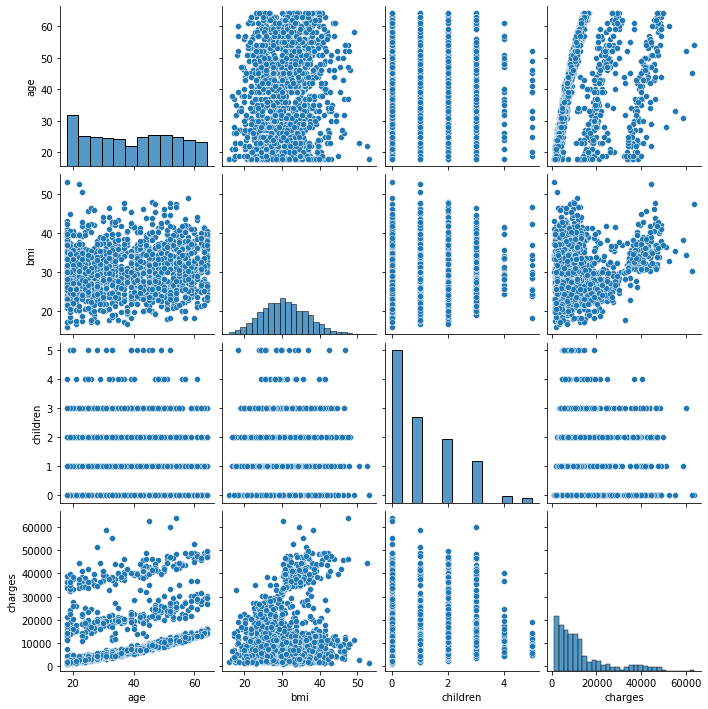

In [6]:
sns.pairplot(data0);

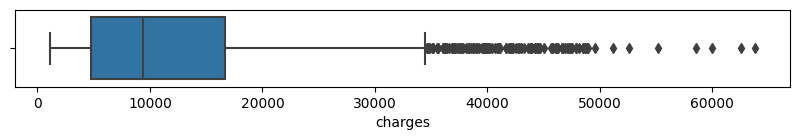

In [7]:
plt.figure(figsize=(10,1))
sns.boxplot(data=data0, x='charges')
plt.show()

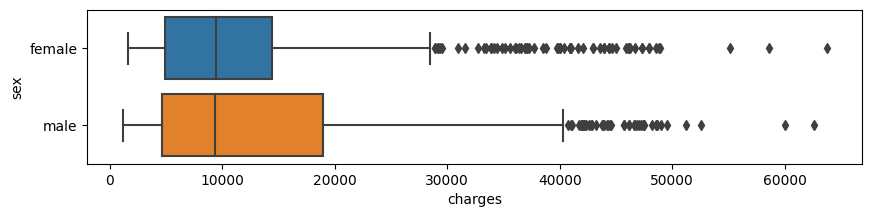

In [8]:
plt.figure(figsize=(10,2))
sns.boxplot(data=data0, x='charges', y='sex')
plt.show()

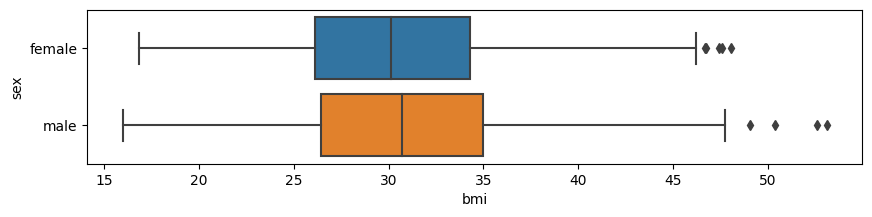

In [9]:
plt.figure(figsize=(10,2))
sns.boxplot(data=data0, x='bmi', y='sex')
plt.show()

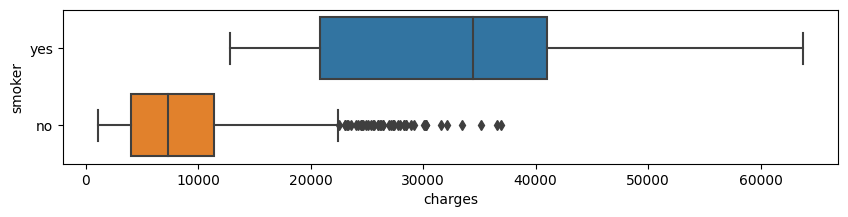

In [10]:
plt.figure(figsize=(10,2))
sns.boxplot(data=data0, x='charges', y='smoker')
plt.show()

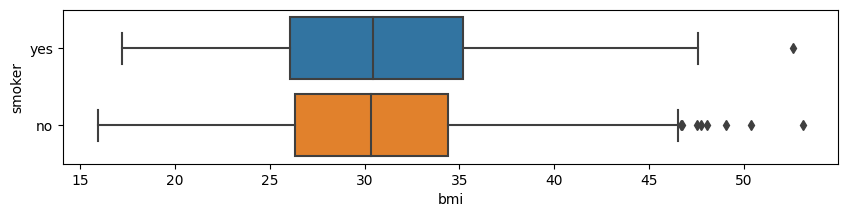

In [11]:
plt.figure(figsize=(10,2))
sns.boxplot(data=data0, x='bmi', y='smoker')
plt.show()

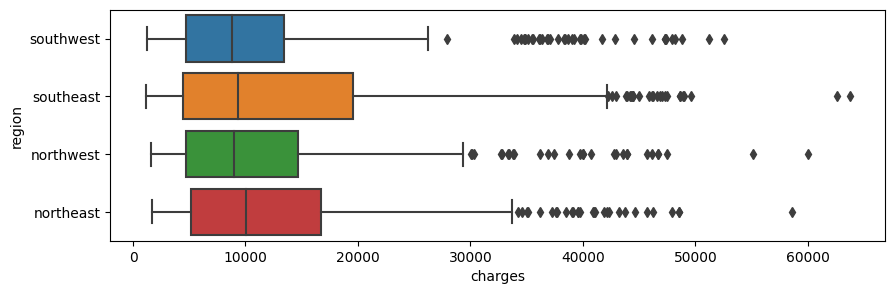

In [12]:
plt.figure(figsize=(10,3))
sns.boxplot(data=data0, x='charges', y='region')
plt.show()

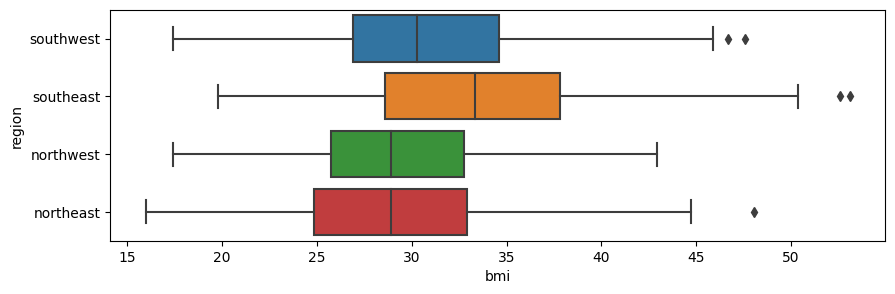

In [13]:
plt.figure(figsize=(10,3))
sns.boxplot(data=data0, x='bmi', y='region')
plt.show()

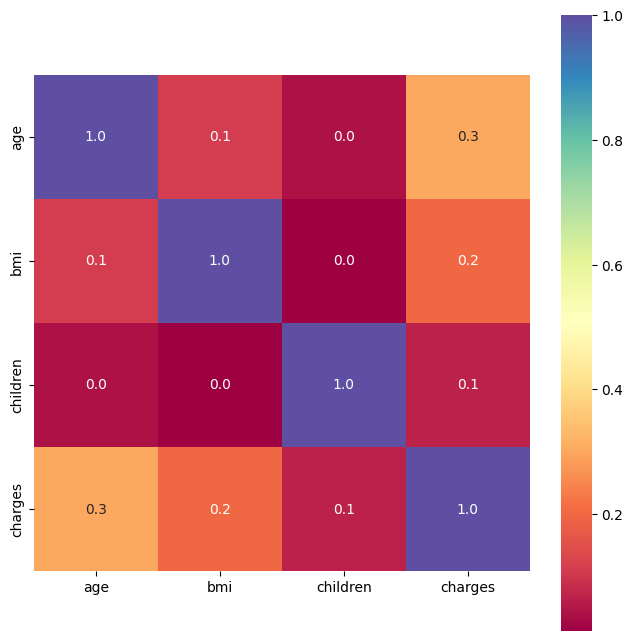

In [14]:
# Correlation matrix between numerical values
plt.figure(figsize=(8,8))
g = sns.heatmap(data0.corr(),annot=True, fmt = ".1f", cmap = "Spectral", square=True)
plt.show()

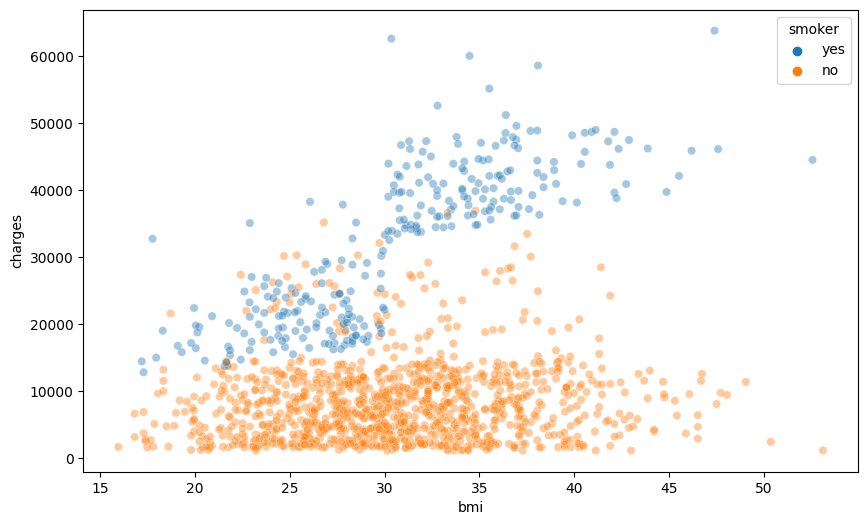

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data0, x="bmi", y="charges", hue="smoker", alpha=0.4);
plt.show()

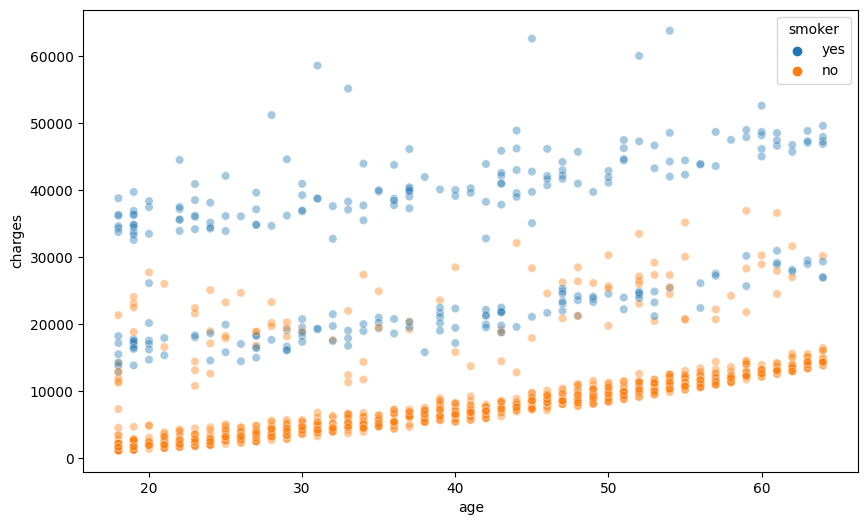

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data0, x="age", y="charges", hue="smoker", alpha=0.4);
plt.show()

Feat eng

In [17]:
data = data0.copy()
data['sex'] = data['sex'].map({"male":0, "female":1})
data['smoker'] = data['smoker'].map({"no":0, "yes":1})
data = pd.get_dummies(data, prefix_sep="__")
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,"1,338.00000",39.20703,14.04996,18.00000,27.00000,39.00000,51.00000,64.00000
sex,"1,338.00000",0.49477,0.50016,0.00000,0.00000,0.00000,1.00000,1.00000
bmi,"1,338.00000",30.66340,6.09819,15.96000,26.29625,30.40000,34.69375,53.13000
children,"1,338.00000",1.09492,1.20549,0.00000,0.00000,1.00000,2.00000,5.00000
smoker,"1,338.00000",0.20478,0.40369,0.00000,0.00000,0.00000,0.00000,1.00000
charges,"1,338.00000","13,270.42227","12,110.01124","1,121.87390","4,740.28715","9,382.03300","16,639.91251","63,770.42801"
region__northeast,"1,338.00000",0.24215,0.42855,0.00000,0.00000,0.00000,0.00000,1.00000
region__northwest,"1,338.00000",0.24290,0.42900,0.00000,0.00000,0.00000,0.00000,1.00000
region__southeast,"1,338.00000",0.27205,0.44518,0.00000,0.00000,0.00000,1.00000,1.00000
region__southwest,"1,338.00000",0.24290,0.42900,0.00000,0.00000,0.00000,0.00000,1.00000


#### Remove outliers

Data without outliers

data.shape =  (1338, 10)


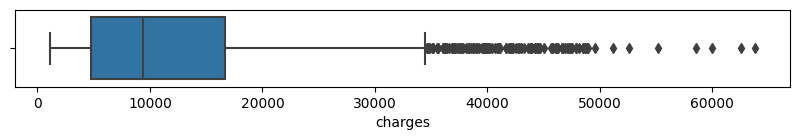

In [18]:
print("data.shape = ", data.shape)
plt.figure(figsize=(10,1))
sns.boxplot(data=data, x='charges')
plt.show()

In [19]:
## outliers
def remove_outliers(data, col):
    q1,q3 = data[col].quantile(0.25),data[col].quantile(0.75)
    iqr = q3-q1
    mi = q1 - (1.5*iqr)
    ma = q3 + (1.5*iqr)
    if mi<data[col].min(): mi = data[col].min()
    if ma>data[col].max(): ma = data[col].max()
    return data[data[col].between(mi,ma)]

In [20]:
# data = remove_outliers(data,col='charges')

# Modelar

## Preprocesamiento de la informacion

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
## normalizar
data = pd.DataFrame(
                MinMaxScaler().fit_transform(data)          # feature_range=(-1,1)
                , columns=data.columns
                , index=data.index
            )

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
## target
target = "charges"


In [25]:
X = data.drop(target,axis=1)
y = data[target]
print("X.shape=",X.shape, ", y.shape=",y.shape)

X.shape= (1338, 9) , y.shape= (1338,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

### Modelo base

In [27]:
import statsmodels.api as sm

In [28]:
lm = sm.OLS(y_train, sm.add_constant(X_train))
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     320.7
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          1.09e-255
Time:                        09:00:43   Log-Likelihood:                 811.61
No. Observations:                 896   AIC:                            -1605.
Df Residuals:                     887   BIC:                            -1562.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0429      0.009     -4.877      0.000      -0.060      -0.026
age                   0.1848      0.011     16.966      0.000       0.163       0.206
sex                   0.0006      0.007      0.085      0.932      -0.012       0.014
bmi                   0.2008      0.022      9.226      0.000       0.158       0.244
children              0.0370      0.013      2.759      0.006       0.011       0.063
smoker                0.3797      0.008     45.308      0.000       0.363       0.396
region__northeast     0.0015      0.006      0.253      0.800      -0.010       0.014
region__northwest    -0.0104      0.006     -1.766      0.078      -0.022       0.001
region__southeast    -0.0170      0.007     -2.594      0.010      -0.030      -0.004
region__southwest    -0.0170      0.006     -2.740      0.006      -0.029      -0.005
==============================================================================
Omnibus:                      211.079   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.485
Skew:                           1.268   Prob(JB):                    6.24e-106
Kurtosis:                       5.559   Cond. No.                     3.89e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Validación cruzada de modelos

Vamos a comparar varios clasificadores populares y evaluar la precisión media de cada uno de ellos mediante un procedimiento de validación cruzada estratificada de kfold.

- Decision Tree
- AdaBoost
- Random Forest
- Extra Trees
- Gradient Boosting
- Multiple layer perceprton (neural network)
- KNN
- Linear Regression

In [29]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor 
from sklearn.ensemble import VotingClassifier, StackingClassifier, StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate
from sklearn.metrics import r2_score, classification_report, accuracy_score, mean_squared_error
import sklearn

In [30]:
# Cross validate model with Kfold stratified cross val
n_splits = 5
kfold = StratifiedKFold(n_splits=n_splits)

In [31]:
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 

```python
## Classifiers
random_state = None
classifiers = []
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(HistGradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
```

In [32]:
list_regressors_models = ['RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','ExtraTreesRegressor','BaggingRegressor','HistGradientBoostingRegressor'
,'KNeighborsRegressor','DecisionTreeRegressor','MLPRegressor'
,'LinearRegression'
]

In [33]:
random_state = 123
regressors_models = dict()
for m in list_regressors_models:
    if m=="AdaBoostRegressor":
        regressors_models[m] = {"regressor": eval(f"{m}(random_state={random_state}, learning_rate=0.1)")}
    elif m=="KNeighborsRegressor":
        regressors_models[m] = {"regressor": eval(f"{m}()")}
    elif m=="LinearRegression":
        regressors_models[m] = {"regressor": eval(f"{m}(fit_intercept=True)")}
    else:
        regressors_models[m] = {"regressor": eval(f"{m}(random_state={random_state})")}
regressors_models

{'RandomForestRegressor': {'regressor': RandomForestRegressor(random_state=123)},
 'AdaBoostRegressor': {'regressor': AdaBoostRegressor(learning_rate=0.1, random_state=123)},
 'GradientBoostingRegressor': {'regressor': GradientBoostingRegressor(random_state=123)},
 'ExtraTreesRegressor': {'regressor': ExtraTreesRegressor(random_state=123)},
 'BaggingRegressor': {'regressor': BaggingRegressor(random_state=123)},
 'HistGradientBoostingRegressor': {'regressor': HistGradientBoostingRegressor(random_state=123)},
 'KNeighborsRegressor': {'regressor': KNeighborsRegressor()},
 'DecisionTreeRegressor': {'regressor': DecisionTreeRegressor(random_state=123)},
 'MLPRegressor': {'regressor': MLPRegressor(random_state=123)},
 'LinearRegression': {'regressor': LinearRegression()}}

In [34]:
## cross validation and run model
## usamos rmse como metrica
p_bar = tqdm(iterable=regressors_models.items(), total=len(regressors_models))
for k,v in p_bar:
    p_bar.set_description(f"Model = {k}")
    model = v['regressor']
    cv_score = cross_val_score(estimator=model, X=X_train, y=y_train, scoring="neg_mean_squared_error", cv=n_splits, n_jobs=4)
    regressors_models[k].update({"cross_val_score": cv_score}) # ,scoring="accuracy"
    regressors_models[k].update({"cv_mean": cv_score.mean(), "cv_std": cv_score.std()})
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    # "r2_score": r2_score(y_test,y_pred), 
    regressors_models[k].update({"model": model, "y_pred": y_pred, "r2_score": r2_score(y_test, y_pred), "rmse": np.sqrt(mean_squared_error(y_pred,y_test))}) ## accuracy es solo para clasificacion
    # print("\t", k)

Model = LinearRegression: 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]            


In [35]:
cv_res = dict((k,dict((kk,vv) for kk,vv in v.items() if kk not in ['model','regressor','cross_val_score','y_pred'])) for k,v in regressors_models.items())
cv_res = pd.DataFrame(cv_res).T
cv_res = cv_res.reset_index().sort_values("cv_mean",ascending=False).reset_index(drop=True).rename(columns={"index":"Algorithms"})
cv_res.set_index('Algorithms')

,cv_mean,cv_std,r2_score,rmse
Algorithms,,,,
GradientBoostingRegressor,-0.00613,0.00048,0.88237,0.06642
RandomForestRegressor,-0.00655,0.00040,0.85900,0.07272
HistGradientBoostingRegressor,-0.00656,0.00066,0.85780,0.07303
AdaBoostRegressor,-0.00672,0.00036,0.84667,0.07583
BaggingRegressor,-0.00704,0.00035,0.85355,0.07411
ExtraTreesRegressor,-0.00749,0.00049,0.82072,0.08200
LinearRegression,-0.00972,0.00093,0.76498,0.09389
MLPRegressor,-0.01025,0.00132,0.77150,0.09257
KNeighborsRegressor,-0.01031,0.00091,0.78416,0.08997


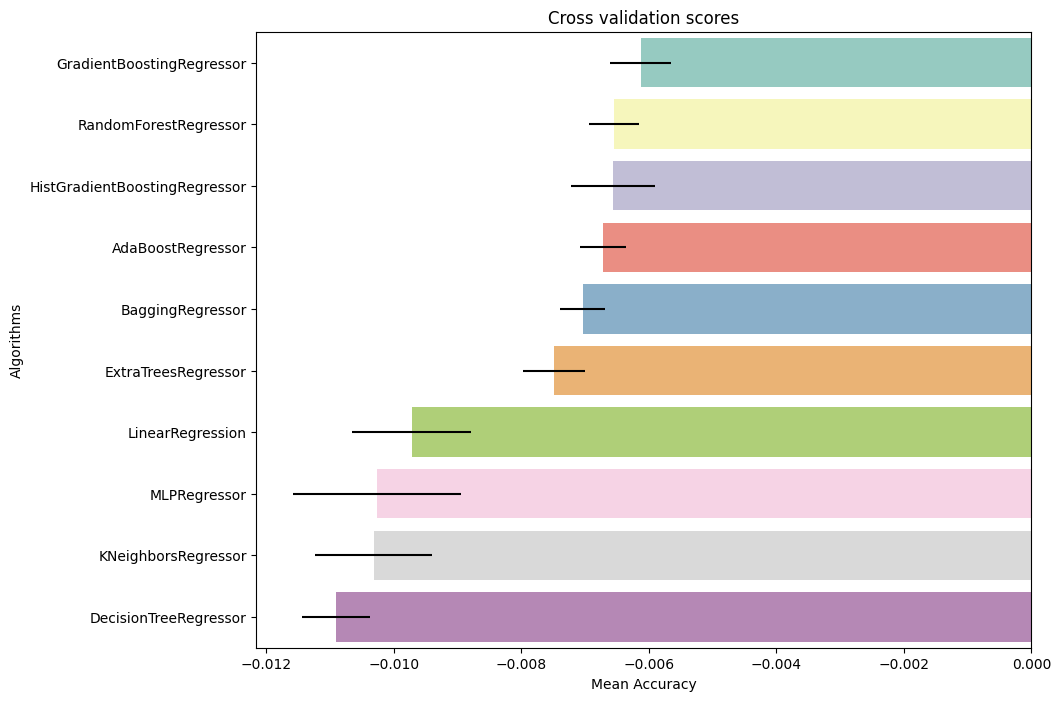

In [36]:
plt.figure(figsize=(10,8))
g = sns.barplot("cv_mean","Algorithms",data=cv_res,palette="Set3",orient="h",**{'xerr':cv_res['cv_std']})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

#### Interpretacion:
Se ecoge el que tiene mejor valor CV, para el caso anterior **CrossValMeans**, en el caso de la metrica usada para el **CV** --> `neg_mean_squared_error` seria el mas positivo.

In [37]:
# Siendo los modelos escogidos:
best_models = list(cv_res['Algorithms'][:4])
# best_models = ['HistGradientBoostingRegressor', 'GradientBoostingRegressor', 'MLPRegressor', 'AdaBoostRegressor']
best_models = dict((k,regressors_models[k]) for k in best_models)
best_models.keys()

dict_keys(['GradientBoostingRegressor', 'RandomForestRegressor', 'HistGradientBoostingRegressor', 'AdaBoostRegressor'])

In [38]:
print("\n".join([f"RMSE for {k} = {v['rmse']}" for k,v in best_models.items()]))

RMSE for GradientBoostingRegressor = 0.06642269001427226
RMSE for RandomForestRegressor = 0.07271982497621363
RMSE for HistGradientBoostingRegressor = 0.07302881587176402
RMSE for AdaBoostRegressor = 0.07583362295316212


In [39]:
#voting : {'hard', 'soft'}
model = VotingRegressor(estimators=[(k, regressors_models[k]['model']) for k in cv_res['Algorithms']], n_jobs=4)

model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred,y_test))

regressors_models['Voting(All)'] = {"model":model, "y_pred":y_pred, "r2_score": r2_score(y_test, y_pred), "rmse": rmse}

print(f"RMSE with Voting (All) = {rmse}")

RMSE with Voting (All) = 0.07049709813970707


In [40]:
#voting : {'hard', 'soft'}
model = VotingRegressor(estimators=[(k, v['model']) for k,v in best_models.items()], n_jobs=4)

model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred,y_test))

regressors_models['Voting(Best)'] = {"model":model, "y_pred":y_pred, "r2_score": r2_score(y_test, y_pred), "rmse": rmse}

print(f"RMSE with Voting (Models) = {rmse}")

RMSE with Voting (Models) = 0.06872839740490376


In [41]:
#stack_method : {'auto', 'predict_proba', 'decision_function', 'predict'}
model = StackingRegressor(estimators=[(k, regressors_models[k]['model']) for k in cv_res['Algorithms']], n_jobs=4)

model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred,y_test))

regressors_models['Stacking(All)'] = {"model":model, "y_pred":y_pred, "r2_score": r2_score(y_test, y_pred), "rmse": rmse}

print(f"RMSE with Stacking (All)= {rmse}")

RMSE with Stacking (All)= 0.06630927205061007


In [42]:
#stack_method : {'auto', 'predict_proba', 'decision_function', 'predict'}
model = StackingRegressor(estimators=[(k, v['model']) for k,v in best_models.items()], n_jobs=4)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred,y_test))

regressors_models['Stacking(Best)'] = {"model":model, "y_pred":y_pred, "r2_score": r2_score(y_test, y_pred), "rmse": rmse}

print(f"RMSE with Stacking(Best)= {rmse}")

RMSE with Stacking(Best)= 0.06687073606972078


In [43]:
res = pd.DataFrame(
        [(k, v['r2_score'], v['rmse']) for k,v in regressors_models.items()]
        , columns = ['Algorithms', 'R2', 'RMSE']
).sort_values("RMSE").reset_index(drop=True)
res.set_index('Algorithms')

,R2,RMSE
Algorithms,,
Stacking(All),0.88277,0.06631
GradientBoostingRegressor,0.88237,0.06642
Stacking(Best),0.88077,0.06687
Voting(Best),0.87406,0.06873
Voting(All),0.86749,0.07050
RandomForestRegressor,0.85900,0.07272
HistGradientBoostingRegressor,0.85780,0.07303
BaggingRegressor,0.85355,0.07411
AdaBoostRegressor,0.84667,0.07583


In [44]:
list(res['Algorithms']).reverse()

In [45]:
# res.to_clipboard()

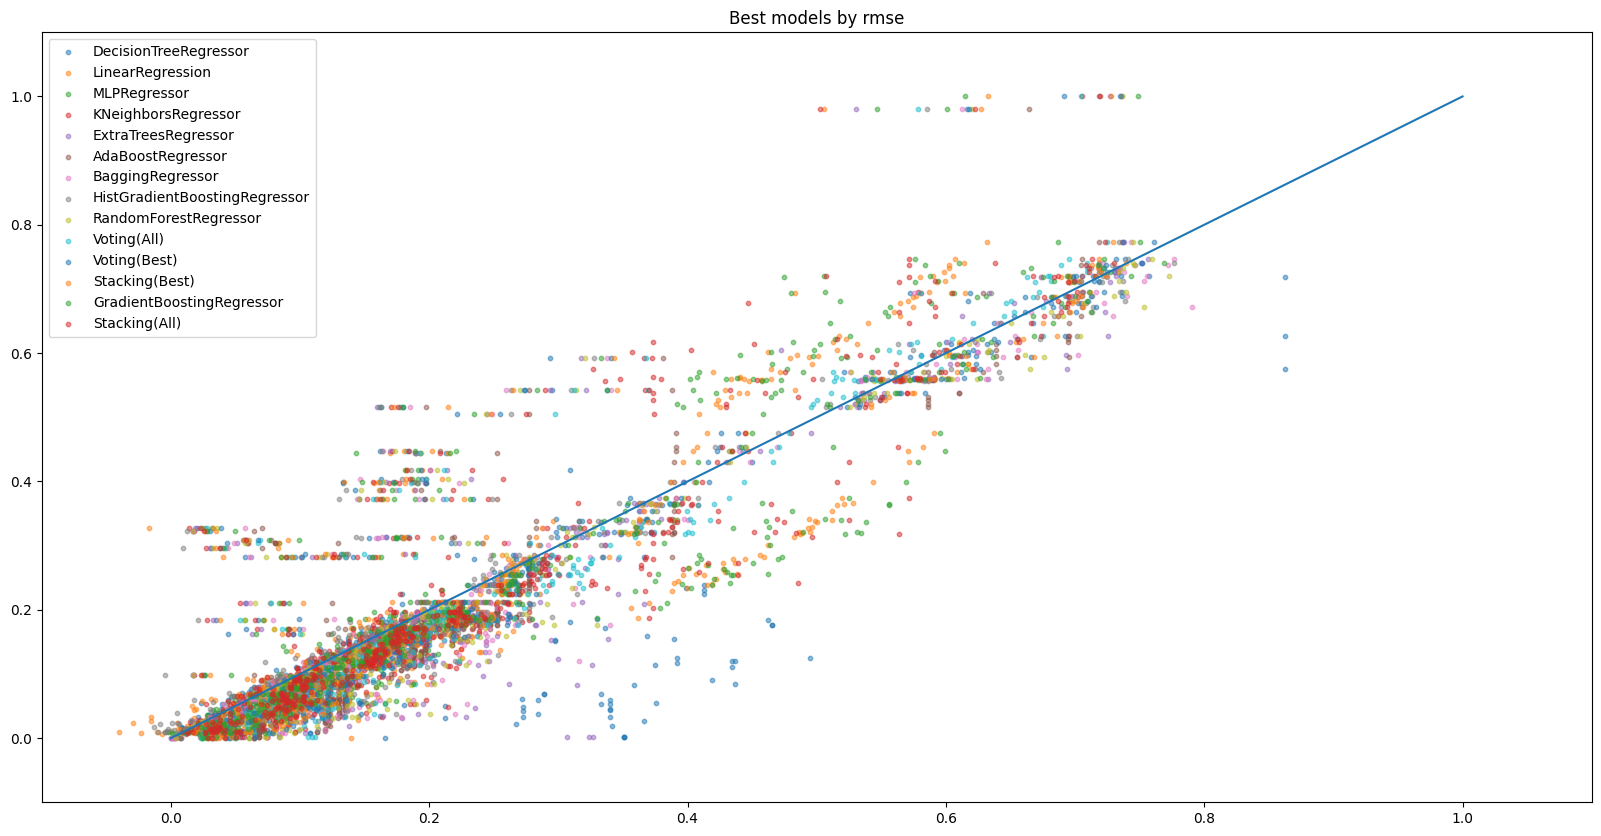

In [46]:
plt.figure(figsize=(20,10))

list_2_plot = list(res['Algorithms'])
list_2_plot.reverse()

for k,y_pred in dict((k,regressors_models[k]['y_pred']) for k in list_2_plot).items():
    plt.scatter(y_pred, y_test, label=k, s=10, alpha=0.5)
plt.plot((0,1),(0,1))
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.legend()
plt.title("Best models by rmse")
plt.savefig("best_models.png")
plt.show()

# Resultado

- Al implementar los metodos de ensamble vs la implementacion puntual de cada uno, los metodos de ensamble arrojan mejores resultados.
- Al quitar los outliers el desempeño de los modelos fue inferior al de usar todos los registros, se contempla que los datos outliers si correspondan a los datos reales del dataset
- Se hicieron pruebas con Voting y Stackin usando los 5 mejores modelos y usandolos todos, como resultado se obtuvo que al usarlos todos Stacking es el que da mejor desempeño.

In [47]:
print("Run all in ", round(time.time()-start_i,2))

Run all in  28.67
